In [1]:
from models import MeshModel
import jax
from jax.typing import ArrayLike
from models.spots import v_spot
from models import MeshModel, IcosphereModel
import jax.numpy as jnp
from jax.typing import ArrayLike
from models.mesh_transform import add_rotation, evaluate_rotation
from plots import plot_3D, plot_2D
from spectrum import simulate_spectrum, blackbody_intensity
from spectrum.spectrum_korg import flux
from functools import partial
from models.spots import add_spots

m = IcosphereModel.construct(1000, 1., 1., 1., jnp.concatenate([jnp.array([jnp.log10(7000)]), jnp.ones(91)*0.5]))

I0000 00:00:1701054963.990924       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


Models defined.


In [2]:
s = add_spots(mesh=m,
              thetas=jnp.array([1.]),
              phis=jnp.array([0.]),
              param_deltas=jnp.array([0.1]),
              radii=jnp.array([1.]),
              radius_factors=jnp.array([1.]),
              param_indices=jnp.array([0]))

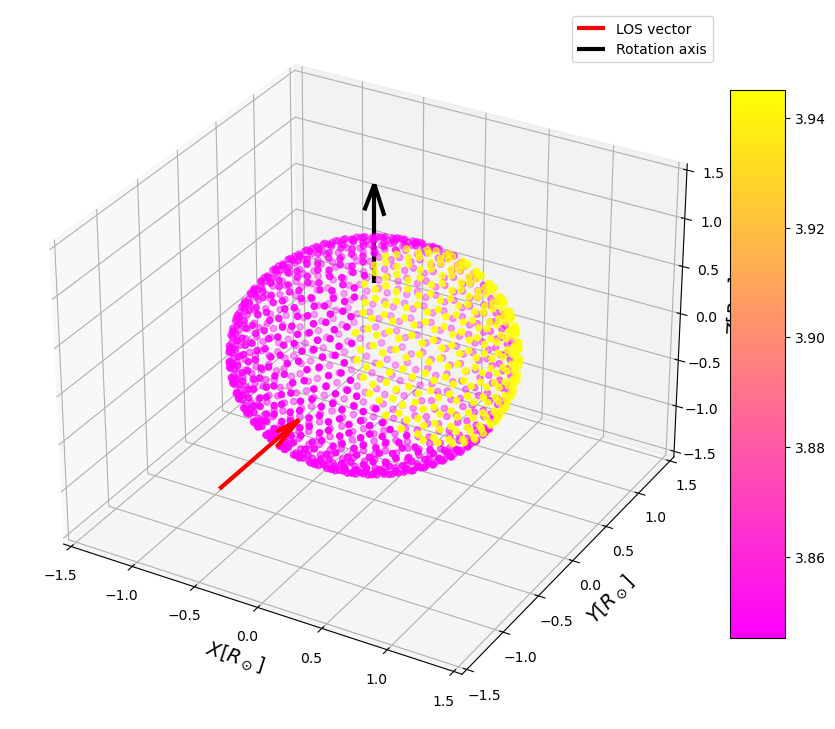

In [3]:
plot_3D(s, 0, cmap='spring');

In [4]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [5]:
bi = blackbody_intensity(jnp.log10(jnp.linspace(1000., 15000., 100)), 0., [np.log10(7000)])
i = simulate_spectrum(blackbody_intensity, m, jnp.log10(jnp.linspace(1000., 15000., 100)))

In [6]:
wvs = jnp.linspace(0000., 30000., 100)
bi1 = blackbody_intensity(jnp.log10(wvs), 0., [np.log10(3500)])
bi2 = blackbody_intensity(jnp.log10(wvs), 0., [np.log10(3000)])

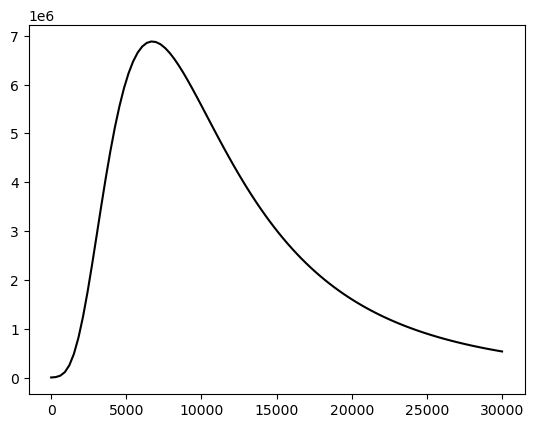

In [7]:
plt.plot(wvs, i[:, 0], color='black', label='Blackbody spectrum')

In [8]:
spectrum = flux(
    jnp.log10(jnp.linspace(1000., 15000., 1)),
    0.5,
    0.5*jnp.ones(92)
)

In [9]:
from spectrum.spectrum import spectrum_flash_sum
from spectrum.spectrum_korg import flux

In [10]:
spectrum_flash_sum(flux,
                   jnp.log10(jnp.linspace(1000., 15000., 100)),
                   jnp.array([0.5]),
                   jnp.array([0.5]),
                   0.5,
                   jnp.array([0.5*jnp.ones(92)]))

In [ ]:
#si = simulate_spectrum(blackbody_intensity, s, jnp.log10(jnp.linspace(1000., 15000., 100)))
k_si = simulate_spectrum(flux, s, jnp.log10(jnp.linspace(1000., 15000., 100)))

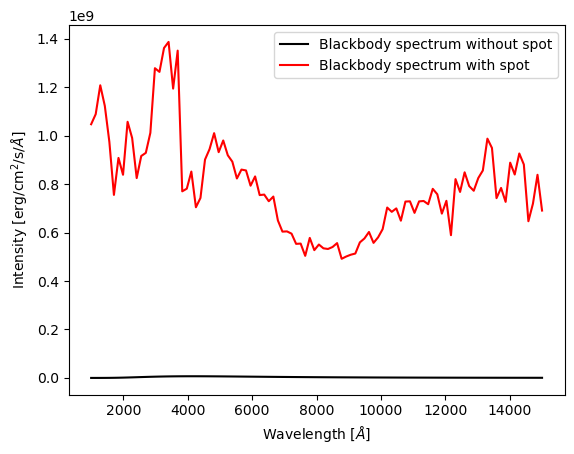

In [ ]:
plt.plot(jnp.linspace(1000., 15000., 100), i[:, 1], color='black', label='Blackbody spectrum without spot');
plt.plot(jnp.linspace(1000., 15000., 100), k_si[:, 1], color='red', label='Blackbody spectrum with spot');

plt.gca().set_ylabel('Intensity [erg/cm$^2$/s/$\AA$]')
plt.gca().set_xlabel('Wavelength [$\AA$]')
plt.legend();

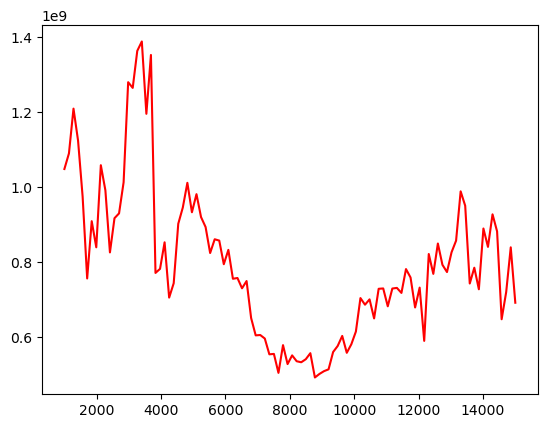

In [ ]:
plt.plot(jnp.linspace(1000., 15000., 100), k_si[:, 1], color='red', label='Blackbody spectrum with spot');

In [ ]:
# shouldn't it be two peaks for spots?